
# Project: Data analysis of TMDb movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitation">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

    In these days, it would be absurd if there exists a person who never watched movies in his/her entire life in USA. 

    Despite the fact that movies are part of our lives, not all people actually know which factors in movie create 
    its popularity.
    
    Then, "What is really with popular movies?"
    
    This simple question led this paper's existence and the analysis aims to provide insights from the real TMDb data.
    This analysis is formed to answer two quetions :
    
    1. Which factors affect movie to its popularity ?
    
    2. Will the factors above top 25% affect the popularity same as question 1 ?
    
    3. Which genre trend has been famous over time?

    

In [1]:
# Importing numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
For the process of data wrangling, I shall first check the shape of the data and investigate which columns are unncessary that shall be dropped. Then I shall drop the unncessary factors and will check the existence of NA values and duplicate values and will drop them.

Furthermore, I will create new dataframe that consist only of genres, time, and popularity so that I can facilitate to answer question 2.

### General Properties

In [2]:
# Calling out the data
df = pd.read_csv('tmdb-movies.csv') 

In [3]:
# Showing the data info
df.head() 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I can confidently assume that columns ['id','imdb_id','homepage','tagline','overview','keywords'] are unnecessary for the popularity.

I would ought to use budget_adj and revenue_adj instead of budget and revenue for the fairness of economic currency so budget and revenue columns will be dropped as well.

Also, there are two time columns, release_year and release_data, but I need only release_year than the realse_data will be dropped as well.

In [4]:
# Showing the data shape.
df.shape

(10866, 21)

This shape tells that there are 10866 rows and 21 columns in the data

In [5]:
# Showing the data info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Above info reveals that there are quite columns with NA. I will investigate NA values again after the dropping the unncessary columns.

It seems that 'id, imdb_id, homepage, tagline, overview, keywords' columns are not useful. 

Also, I think budget_adj and revenue_adj can replace budget and revenue so I will drop the latter two.

Furthermore, there exist null-values in production_companies, cast, director, and genres, which are not numbers that can be filled with mean_values so will be dropped as well.

In [6]:
# Dropping the unncessary columns.
df.drop(['id','imdb_id','homepage','tagline','overview','keywords','release_date', 'budget', 'revenue'], axis=1, inplace=True)

In [7]:
# Showing the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


From 21 columns it became 12 columns as I dropped 9 columns. 

Perfect!

Let's count on NA values. Among 10866 columns, cast has 10790 {NA:76}, director has 10822 {NA:44}, genres has 10843 {NA:23}, and production_companies has 9836 {NA:1030}. 

In here, all NA values are not in numerical form that I cannot fill the NA with mean values so I will just drop them.

In [8]:
# Dropping the NA values and their index in all data.
df.dropna(inplace=True) 

In [9]:
# Shwoing the data info.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 12 columns):
popularity              9773 non-null float64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 992.6+ KB


Now, the data has from 10866 to 9773 rows and there is no NA values anymore.
Let's check for the duplicate values.

In [10]:
# Finding how many duplicate values are there in the data.
df.duplicated().sum() 

1

In [11]:
 # Finding which one is duplicated
df[df.duplicated()==True]

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010,30000000.0,967000.0


So there is only 1 duplicated movie, titled "TEKKEN". This shall be dropped.

In [12]:
 # Dropping the duplicated value while keeping only unique one value left.
df.drop_duplicates(inplace=True)

In [13]:
# Showing the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 12 columns):
popularity              9772 non-null float64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 992.5+ KB


From 9773 rows to 9772 rows, it is clear that the 1 duplicated Tekken is now dropped. This data is now very clean to execute the analysis.

Yet, I personally would like to rename columns [budget_adj, revenue_adj] to [budget, revenue]. Let's rename them.

In [14]:
# Renaming the budget and revenue columns

df.rename({'budget_adj' : 'budget', 'revenue_adj' : 'revenue'}, axis = 'columns', inplace = True)

# Checking whether the new names are in the columns.
'budget' and 'revenue' in df.columns

True

It is now clear that the renaming process is executetd with no problem.

Next, I would like to create another dataframe called "df_genre" that contains only 3 columns : genres, release_year, and popularity.

First, let us investigate about the column genres.


In [15]:
# Creating another dataframe that consists of only the three columns
df_genre = df.copy().filter(['popularity','release_year','genres']) 

# Showing the top 10 index of these dataframe.
df_genre.head(10) 

,popularity,release_year,genres
0,32.985763,2015,Action|Adventure|Science Fiction|Thriller
1,28.419936,2015,Action|Adventure|Science Fiction|Thriller
2,13.112507,2015,Adventure|Science Fiction|Thriller
3,11.173104,2015,Action|Adventure|Science Fiction|Fantasy
4,9.335014,2015,Action|Crime|Thriller
5,9.110700,2015,Western|Drama|Adventure|Thriller
6,8.654359,2015,Science Fiction|Action|Thriller|Adventure
7,7.667400,2015,Drama|Adventure|Science Fiction
8,7.404165,2015,Family|Animation|Adventure|Comedy
9,6.326804,2015,Comedy|Animation|Family


The df_genre is executed successfully with the three columns. 

However, the genre value looks very messy because it is composed of multiple genres with seperation '|'. 

What I need is the genre column with one genre value, not multiple genres like this.

The solution for this problem is creating an array filled with stacked '|' splitted values splitting '|' and joining that array back to the df_genre data.

Furthermore, as there seems to be too many genre values, I will drop the "averagely below 25% popularity genre" from the df_genre.

In [16]:
# Creating an array that is stacked of splitted genres 
new_array = df_genre['genres'].str.split('|').apply(pd.Series,1).stack()
# Shows first 15 values.
new_array.head(15)

0  0             Action
   1          Adventure
   2    Science Fiction
   3           Thriller
1  0             Action
   1          Adventure
   2    Science Fiction
   3           Thriller
2  0          Adventure
   1    Science Fiction
   2           Thriller
3  0             Action
   1          Adventure
   2    Science Fiction
   3            Fantasy
dtype: object

This new_array is stacked of the splitted genres and have two countings in its columns.

The first counting shall be dropped because it disrupts putting it back to df_genre data.

In [17]:
# Dropping the first counting level.
new_array.index = new_array.index.droplevel(-1)
# Shows first 15 values.
new_array.head(15)

0             Action
0          Adventure
0    Science Fiction
0           Thriller
1             Action
1          Adventure
1    Science Fiction
1           Thriller
2          Adventure
2    Science Fiction
2           Thriller
3             Action
3          Adventure
3    Science Fiction
3            Fantasy
dtype: object

Now clearly, the first counting column is dropped. I will then name the genre column as 'genres'.

In [18]:
# Naming the column as 'genres'
new_array.name = 'genres'
new_array.head(15)

0             Action
0          Adventure
0    Science Fiction
0           Thriller
1             Action
1          Adventure
1    Science Fiction
1           Thriller
2          Adventure
2    Science Fiction
2           Thriller
3             Action
3          Adventure
3    Science Fiction
3            Fantasy
Name: genres, dtype: object

The above code is perfectly executed and now the array got a name, 'genres'.

Next thing is to delete the genre column in df_gen to create space for joinning this new array into the df_gen.

In [19]:
# Deleting the genre column in df_genre
del(df_genre['genres'])
df_genre.head(10)

,popularity,release_year
0,32.985763,2015
1,28.419936,2015
2,13.112507,2015
3,11.173104,2015
4,9.335014,2015
5,9.110700,2015
6,8.654359,2015
7,7.667400,2015
8,7.404165,2015
9,6.326804,2015


The genre column is dropped well. I will join the new array now.

In [20]:
# Joining the array into the df_genre
df_genre = df_genre.join(new_array)
df_genre.head(15)

,popularity,release_year,genres
0,32.985763,2015,Action
0,32.985763,2015,Adventure
0,32.985763,2015,Science Fiction
0,32.985763,2015,Thriller
1,28.419936,2015,Action
1,28.419936,2015,Adventure
1,28.419936,2015,Science Fiction
1,28.419936,2015,Thriller
2,13.112507,2015,Adventure
2,13.112507,2015,Science Fiction


Well done! the modified df_genre data now has only one genre value in each genre column cell while keeping the popularity and release_year. 

So far so good!

What's next is to drop "averagely below 25% popularity genre". Let's see how many unique genres are there. 

In [21]:
# Counts of unique genres
len(df_genre.genres.unique())

20

So there are 20 genres, which means 25% of them, or 5 genres, should be dropped.

Let's investigate which genres are not popular. In order to do this, I will groupby the data by the genres, get their average, and sort the popularity in descending order to easily check for last 5 least popular genres. 

In [22]:
# Grouping the data with genres, getting the mean value, and sorting thhe popularity in descending order.
df_genre.groupby(['genres']).mean().sort_values(by=['popularity'], ascending=False)

,popularity,release_year
genres,,
Adventure,1.209053,1999.216040
Science Fiction,1.065278,1999.738556
Fantasy,1.056310,2000.189286
Action,0.968256,1999.875168
Animation,0.914281,2004.136143
Family,0.846467,2000.562557
Thriller,0.772172,2001.442826
Crime,0.767337,1999.237105
War,0.752777,1995.868217


Now we see that the least popular genres are the last 5 genres : 'Foreign', 'Documentary', 'TV Movie', 'Horror', and 'Music'.

I honestly believe these make sense because these genres are my least favorite movie genres as well.

Anyways, let's drop those unpopular 5 genres. I will create a function called "df_drop", which drops the genres, to avoid repetition.

In [23]:
# Creating df_drop function that drops the genres when executed.
def df_drop(x) :
    index = df_genre[df_genre.genres == x].index
    df_genre.drop(index, inplace=True)
# Dropping 'Foreign'
df_drop('Foreign')
# Dropping 'Documentary'
df_drop('Documentary')
# Dropping 'TV Movie'
df_drop('TV Movie')
# Dropping 'Horror'
df_drop('Horror')
# Dropping 'Music'
df_drop('Music')

# Showing the results : the list of remaining genres, and counting of remaining genres.
[df_genre.genres.unique(), len(df_genre.genres.unique())]

[array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
        'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
        'Mystery', 'Romance', 'War', 'History'], dtype=object), 15]

In [24]:
# Shwoing top 20 order samples of the result df_genre
df_genre.head(20)

,popularity,release_year,genres
0,32.985763,2015,Action
0,32.985763,2015,Adventure
0,32.985763,2015,Science Fiction
0,32.985763,2015,Thriller
1,28.419936,2015,Action
1,28.419936,2015,Adventure
1,28.419936,2015,Science Fiction
1,28.419936,2015,Thriller
2,13.112507,2015,Adventure
2,13.112507,2015,Science Fiction


Perfectly done! The are no more the 5 genres and the length changed from 20 to 15.

So far, I have cleansed original "df" file by dropping seemingly unncessary columns, NA values, and duplicated values. 
I have also created new dataframe called "df_gen" that has single genre in each rows with no troubles in index.

I am now done with the Data Wrangling by here.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : What factors in movies are related to their popularity ?

>Really, what factors are related?

>In this question, I will investigate numerical values such as budget_adj, runtime, and votes, and see whether these values are averagely proportional to popularity through plotting.

>Yet, if the plotting seems not to give clear answer, I will compare and contrast the popularity with interquartile range of the other value by dividing them into 4 labels and will investigate proportionality in average. 

Do more budget means more popularity in movies?

In common sense, today's system follows capitalism so perhaps it may be correct.

First of all, I will investigate on relationship of budget and popularity. 

Let's first see the plotting by itself only.

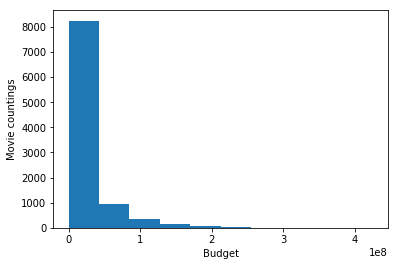

In [25]:
# Plotting the budget by itself

plt.hist(df['budget'])
plt.xlabel('Budget')
plt.ylabel('Movie countings')
plt.show();

The above budget plot portrays extreme right-skewed distribution. The mode seems to exist at xlabel 0 to 0.5 and mean seems to exist somewhere near xlabel 0.5 to 0.6. 

This can be interpreted that most movies do not require budget more than $0.5e8.

Let us now investigate the relationship between popularity and budget.

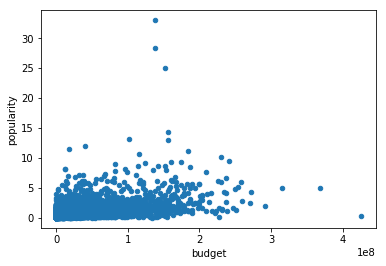

In [26]:
# Scatter Plotting relationship between budget and popularity

df.plot(x="budget", y="popularity", kind="scatter");

From the above plot, it is clear that there exists huge outlier with most budget but perhaps near to least popularity. 

Besides the outlier, I can claim that the popularity is little proportional to budget but it is hard to prove the claim as the plot is poorly distributed.

Therefore I decided to use interqurtile range as the plot's labels. Before getting the interquartile range, I will create a "df" data copy called "df_1" that contains only budget and popularity and will use this for the budget analysis.

In [27]:
# Created new copy of df with filtering unnecessary data besides budget and popularity
df_1 = df.copy().filter(items = ['popularity', 'budget'])

# Getting the interquartile range : 0%, 25%, 50%, 75%, 100% respectively
intr_qrt = list(df_1.describe().budget[3:9])
intr_qrt

[0.0, 0.0, 306134.21438059653, 24642679.688743703, 425000000.0]

The interquartile is executed but there is one weird thing here : THERE ARE TWO ZEROES!

This shows that 0% and 25% were all 0, a result of extreme right-skewed distribution. Yet, in order to avoid conflict in plotting later, I will set the 25% to be 1.

In [28]:
intr_qrt[1] = 1
intr_qrt

[0.0, 1, 306134.21438059653, 24642679.688743703, 425000000.0]

The interquartile range is expectedly set.

Next, I will create labels that is categorized by 4 levels : 
Lv1 = [0% to 25%]

Lv2 = [25% to 50%]

Lv3 = [50% to 75%]

Lv4 = [75% to 100%]

And will add new column called 'budget_level' that classifies the rows with the edges.


In [29]:
# Creating the labels for the budget level
bin_labels = ['Lv1', 'Lv2', 'Lv3', 'Lv4']

# Adding new column that classfies based on the labels
df_1['budget_level'] = pd.cut(df_1['budget'], intr_qrt, labels = bin_labels)

# Shpowing samples of new df_1
df_1.head(20)

,popularity,budget,budget_level
0,32.985763,1.379999e+08,Lv4
1,28.419936,1.379999e+08,Lv4
2,13.112507,1.012000e+08,Lv4
3,11.173104,1.839999e+08,Lv4
4,9.335014,1.747999e+08,Lv4
5,9.110700,1.241999e+08,Lv4
6,8.654359,1.425999e+08,Lv4
7,7.667400,9.935996e+07,Lv4
8,7.404165,6.807997e+07,Lv4
9,6.326804,1.609999e+08,Lv4


The sample clearly shows that the budget_level is properly created.

Next, I will create dataframe called "bud_ave" that is groupby with budget_level and average popularity.

In [30]:
# Creating an array groupby with budget_level with mean popularity for each level

bud_ave = df_1.groupby('budget_level').popularity.mean() 
bud_ave

budget_level
Lv1    0.348766
Lv2    0.357166
Lv3    0.665730
Lv4    1.399824
Name: popularity, dtype: float64

The bud_ave clearly is correcly executed and next thing to do is to visualize this result through graph.

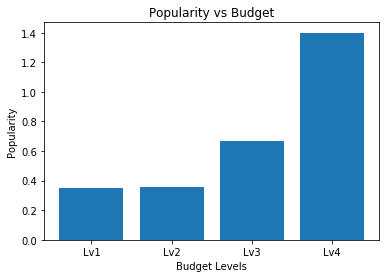

In [31]:
# Plotting the bud_ave

plt.bar(list(bud_ave.index), list(bud_ave))

# Naming the title
plt.title('Popularity vs Budget')

# Naming the x-axis
plt.xlabel('Budget Levels')
# Naming the y-axis
plt.ylabel('Popularity');

The plot now clearly shows that higher the budget level, higher the popularity : that, the budget is directly proportional to popularity. Capitalism definitely exists in the movie!

For the next factor, let's move on to another factor, votings. There are two of them, vote_count and vote_average. Intuitionally, "the more the vote, the more the popularity" makes perfect sense but who knows?

Let's first look at the histograms vote_count and vote_average,

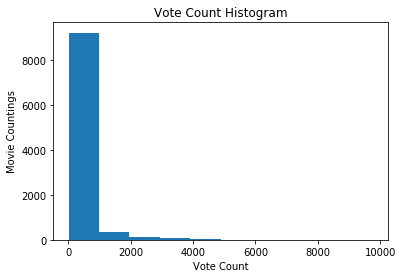

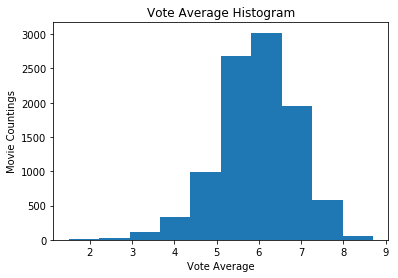

In [32]:
# Plotting histogram of the vote_count

plt.hist(df['vote_count'])
plt.title('Vote Count Histogram')
plt.xlabel('Vote Count')
plt.ylabel('Movie Countings')
plt.show();

# Plotting histogram of vote_average

plt.hist(df['vote_average'])
plt.title('Vote Average Histogram')
plt.xlabel('Vote Average')
plt.ylabel('Movie Countings')
plt.show();

These histograms represent that the vote_count histogram seems to be extremely right-skewed whereas the vote_average histogram seems to have quite balanced distribution yet little bit left-skewed.

The plots imply that it is rare for movies to exceed 1000 votes and it is common for movies to have ratings around 5 to 7.

Let us now see the plots of votes and popularity.

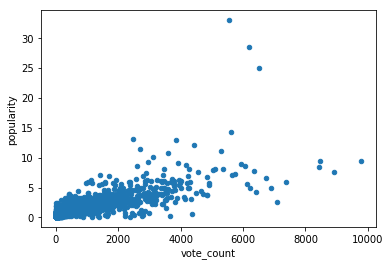

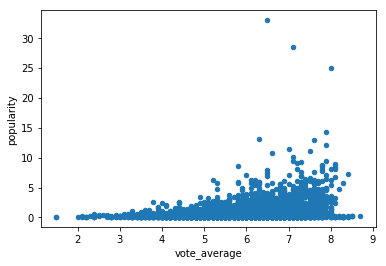

In [33]:
# Plot : vote_count vs popularity

df.plot(x="vote_count", y="popularity", kind="scatter")

# Plot : vote_average vs popularity
df.plot(x="vote_average", y="popularity", kind='scatter');

For the vote count plot, there seem to be 3 extremely popular outliers between 6000 and 8000 votes but it still clearly shows that vote_count matters to the popularity.

For the vote_average plot, it also have 3 outliers but it shows clean directly-proportional ratio between vote_average and popularity.

In short, both are postively related to the popularity.

For the next factor, I will investigate into the runtime by first showing its histogram.

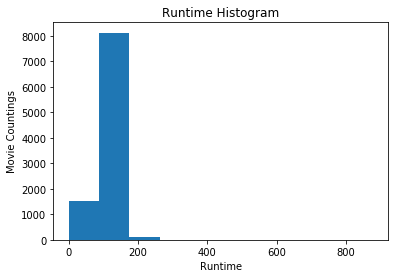

In [34]:
# Plotting histogram of the runtime

plt.hist(df['runtime'])
plt.title('Runtime Histogram')
plt.xlabel('Runtime')
plt.ylabel('Movie Countings')
plt.show();

The histogram above is extremely right-skewed and implies that most movies' runtimes are between 0 to 150 minutes, which personally I agree with.

Then I will plot that presents relationship between runtime and popularity.

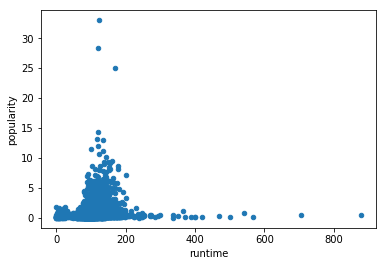

In [35]:
# Plot : runtime vs populatiry

df.plot(x="runtime", y="popularity", kind="scatter");

It seems like there is a positive relationship at some point but drastically drops near 200 minutes in popularity as the runtime gets longer. Also, the plot shows that too much runtime is a decreasing factor.

The relationship is weak to support to claim a relationship that I shall divide them into interquartile range, just like what I did in "budget vs popularity", and will plot again with average runtime groupby each interquairtles.

First, I will create copy of orignal data called "df_2" that filters all columns except runtime and popularity.

In [36]:
# Creating a filtered copy

df_2 = df.copy().filter(items=['runtime', 'popularity'])

# Sample
df_2.head()

,runtime,popularity
0,124,32.985763
1,120,28.419936
2,119,13.112507
3,136,11.173104
4,137,9.335014


df_2 is clear in its form. 

Next is to create list of interquartile range of runtime called "int_qrt".

In [37]:
# Creating a list of the runtime interquartile range.

int_qrt = list(df_2.describe().runtime[3:9]) #Budget levles from 0% to 100%

# Sample
int_qrt

[0.0, 90.0, 100.0, 112.0, 877.0]

The interquartile range is clearly set. Next is to classify the levels of interquartile range into 4 categories : 

Lv1 = [0% to 25%]

Lv2 = [25% to 50%]

Lv3 = [50% to 75%]

Lv4 = [75% to 100%]

After setting the levels, I will add new column into df_2 called 'runtime_level' that classifies the rows with the 4 levels.

In [38]:
# List of classified levels

run_levels = ['Lv1', 'Lv2', 'Lv3', 'Lv4']

# Adding the new column as a classifier based on the levels

df_2['runtime_level'] = pd.cut(df_2['runtime'], int_qrt, labels = run_levels)

# Sample of the result
df_2.head()

,runtime,popularity,runtime_level
0,124,32.985763,Lv4
1,120,28.419936,Lv4
2,119,13.112507,Lv4
3,136,11.173104,Lv4
4,137,9.335014,Lv4


The 'runtime_level' column is properly added to the df_2.

Next, I will create dataframe called "bud_ave", a groupby data with runtime_level and is classfied average popularity in each runtime_level.

In [39]:
# Creating new dataframe, "run_ave", that 

run_ave = df_2.groupby('runtime_level').popularity.mean() #average populairty for each budget level

run_ave

runtime_level
Lv1    0.449757
Lv2    0.587258
Lv3    0.690552
Lv4    1.072615
Name: popularity, dtype: float64

Perfectly executed! Then now I will plot this in bar to visually represent the relationship with levels and popularity.

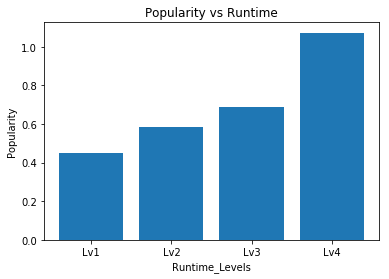

In [40]:
# Plotting bar of run_ave

plt.bar(list(run_ave.index), list(run_ave))

# Naming the title
plt.title('Popularity vs Runtime')
# Naming the x-axis
plt.xlabel('Runtime_Levels')
# Naming the y-axis
plt.ylabel('Popularity');

As the runtime's level increases, the popularity increases as well.

Although too much runtime might negatively affect the popularity, the average popularity of 75%+ runtime movies sketched highest bar.

>Therefore, the conclusion for this Research Question is that :

>#### In Average,
>#### Budget ∝ Popularity
>#### Vote Count ∝ Popularity
>#### Vote Rating ∝ Popularity
>#### Runtime ∝ Popularity

### Research Question 2 : Will there be any change to their proportionality to the popularity for the top 25%?

>Okay, it is clear that all those factors (Budget, Vote_Count, Vote_Rating, Runtime) directly matter to the popularity in general.

> Then will the same scenario appear when the values are all above 75% or top 25%? Or other term, will the general proportionality still be hold when the analysis is within the ranges between [75%-80% , 80%-85% , 85%-90% , 90%-95%, 95%-100%]?

>In this question, I will first create a function, "ave_visualizer", that exectues plot of dataframe that groupby popularity their own interquartile range within the range above 75%, and will further investigate on the graph.

In here, I will create a function, "ave_visualizer" that does all the process for visualizing the interquartile range with popularity.

In [41]:
# Creates ave_visualizer

def ave_visualizer(factor):
    # Creates new dataframe filered with popularity and factor
    df_new = df.filter(items = ['popularity', factor])
    # The 75% value in the interquartile range
    the_75 = df_new.describe()[factor][6]
    # Query that filters values above the 75% values
    df_new = df_new.query('{} >= {}'.format(factor, the_75))
    # Creates another interquartile range that is [75%-80% , 80%-85% , 85%-90% , 90%-95%, 95%-100%]
    intr_qrt = list(df_new.describe()[factor][3:8])
    # Naming the levels of the intr_qrt range
    levels = ['Lv1', 'Lv2', 'Lv3', 'Lv4']
    # Adding new coloumn that classfies the values based on the levels
    df_new['{}_level'.format(factor)] = pd.cut(df_new[factor], intr_qrt, labels = levels)
    # Creating data that groupby levels with average popularity
    ave = df_new.groupby('{}_level'.format(factor)).popularity.mean()
    
    # Visualization
    plt.bar(list(ave.index), list(ave))
    # Naming the title
    plt.title('Popularity vs {}'.format(factor))
    # Naming the x-axis
    plt.xlabel('{}_Levels'.format(factor))
    # Naming the y-axis
    plt.ylabel('Popularity')
    plt.show;

It was hard work but exectues exact result, the visualizer of interquartile ranges within the high-end level (level 4).

Let us use this ultimate function to visualize budget first.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


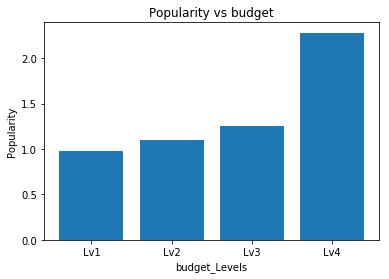

In [42]:
# Visualization of populatriy vs budget {budget => 75%}

ave_visualizer('budget'); 

The box plot above shows that the average popularity becomes drastically high when it reaches the Lv4, implying that budget absolutely matter to the popularity.

Next, let's look at the vote_count.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


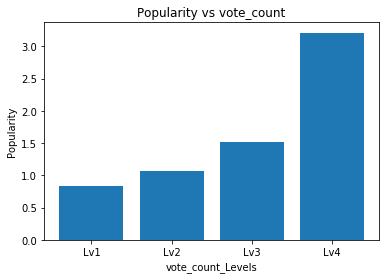

In [43]:
# Visualization of populatriy vs vote_count {vote_count => 75%}

ave_visualizer('vote_count');

The vote_count plot also cleary shows that when the vote_count reaches Lv4, the popularity immediately rises.

What about the vote_average?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


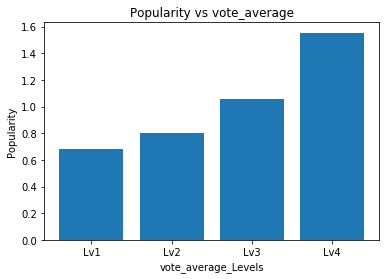

In [44]:
# Visualization of populatriy vs vote_average {vote_average => 75%}

ave_visualizer('vote_average');

Nevertheless, the plot also points out that the vote_average is directly proportional to the popularity.

Lastly, let's investigate the runtime.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


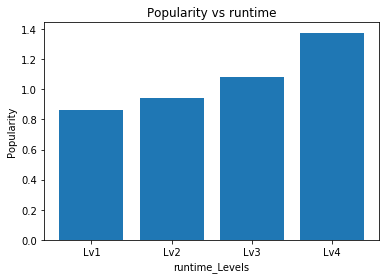

In [45]:
# Visualization of populatriy vs runtime {runtime => 75%}

ave_visualizer('runtime');

The runtime is not an exception. It similarly follows the generality rule that higher the runtime, higher the popularity.

> As shown above, the general rule that more the factors, more the popularity in average also holds when the factor values(top 25%) are in average classified by interquaritle range within [75%-80% , 80%-85% , 85%-90% , 90%-95%, 95%-100%].

> Therefore the conclusion for this question is that :

>#### In average within top 25%,

>#### Budget ∝ Popularity
>#### Vote Count ∝ Popularity
>#### Vote Rating ∝ Popularity
>#### Runtime ∝ Popularity

> Same rules hold with the conclusion in question 1.

### Research Question 3  : Which genre was popular over time?

> Now is the time to use "df_genre" in here, which was built in data wrangling.

> To proceed, let's define about 'over time'. Should this be year by year? 3 year by 3 year? This will be decided by the shape of the histogram.

> After deciding the definition of 'over time', I will create a function that will visualize the input with pie plot and will investigate after the visualization.

First thing first, to define the 'over time', let's see which shape is the histogram of release_year.

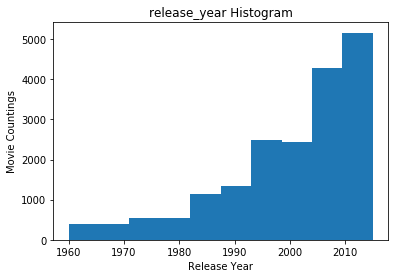

In [46]:
plt.hist(df_genre.release_year)
plt.title('release_year Histogram')
plt.xlabel('Release Year')
plt.ylabel('Movie Countings')
plt.show();

The shape is left-skewed, which means that the definition of 'overtime' is the interquartile range of release_year.

Interquartile range again!

In [47]:
# Info of df_genres.release_year

df_genre.release_year.describe()

count    18701.000000
mean      2000.120207
std         12.808294
min       1960.000000
25%       1993.000000
50%       2004.000000
75%       2010.000000
max       2015.000000
Name: release_year, dtype: float64

From above statistics, it is shown that min=1960, 25%=1993, 50%=2004, 75%=2010, max=2015. 

This means that

1960 < 1st_qrt< 1993, 

1993 < 2nd_qrt < 2004, 

2004 < 3rd_qrt < 2010, 

2010 < 4th_qrt < 2015.

In [48]:
# Creating interquaritle range of the df_genre.release_year

intr_qrt = list(df_genre.release_year.describe()[3:8])
intr_qrt[0] = 1599.9
intr_qrt

[1599.9, 1993.0, 2004.0, 2010.0, 2015.0]

I set the 1st quarter to be 1599.9 to avoid NA values when it groupby.

Now, the interquartile setting is done. It says,

0% = 1960

25% = 1993

50% = 2004

75% = 2010

100% = 2015

Then I will create list called levels and this will be the value between each interquartile range.

In [49]:
# Naming the levels of the intr_qrt range

levels = ['1qt', '2qt', '3qt', '4qt']

# Adding new coloumn that classfies the values based on the levels

df_genre['quarter']= pd.cut(df_genre['release_year'], intr_qrt, labels = levels)
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18701 entries, 0 to 10864
Data columns (total 4 columns):
popularity      18701 non-null float64
release_year    18701 non-null int64
genres          18701 non-null object
quarter         18701 non-null category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 602.9+ KB


I just added new column called "quarter" and and in there, values are set in a way that :

1qt = [0% - 25%]

2qt = [25% - 50%]

3qt = [50% - 75%]

4qt = [75% - 100%]

Next, I will groupby the data with 'quarter' and 'genres' and average.

In [50]:
# Creating groupby data with quarter and genre, and their average

df_gen_qrt = df_genre.groupby(['quarter','genres']).mean()

# Sample
df_gen_qrt.head()

popularity  release_year
quarter genres                             
1qt     Action       0.663253   1982.111927
        Adventure    0.825351   1981.512195
        Animation    0.794427   1981.223881
        Comedy       0.521856   1983.076177
        Crime        0.556680   1982.478386

The new data is successfully executed.

Next is to break the data into 4 quarters with popularity columns.

In [55]:
# Creating 1st quarter data
first_qt = df_gen_qrt.iloc[0:15].popularity

# Creating 2nd quarter data
second_qt = df_gen_qrt.iloc[15:30].popularity

# Creating 3rd quarter data
third_qt = df_gen_qrt.iloc[30:45].popularity

# Creating 4th quarter data
fourth_qt = df_gen_qrt.iloc[45:].popularity

All quarterly data created! Let's create labels that has unique values of genres.

In [56]:
labels = sorted(df_genre.genres.unique()) # labels
labels

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western']

Labels done! It's a function time. This function will will visualize the data in pie chart.

For the detail of function, please read the comments carefully.

In [57]:
def visual(qrt):           # Visual function
    expld_index = []
    def explode_index(qrt): # This function creates explode_index. This will differentiate the first, second, and third.
        for a in range(len(qrt)):
            b = list(qrt.copy()) 
            b.remove(max(qrt)) # b exists to get the 2nd max
            c = b.copy()
            c.remove(max(b))   # c exists to get the 3rd max
            if qrt[a] == max(qrt):
                expld_index.append(0.3) # 0.3 if max
            elif qrt[a] == max(b):
                expld_index.append(0.2) # 0.2 if 2nd max
            elif qrt[a] == max(c):
                expld_index.append(0.1) # 0.1 if 3rd max
            else:
                expld_index.append(0)
        return expld_index
    # Setting the subplots
    fig1, ax1 = plt.subplots()
    # Pie plotting
    ax1.pie(qrt, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140, pctdistance=0.9, labeldistance=1.2, explode=explode_index(qrt))
    ax1.axis('equal')
    # The titles
    if qrt.index[0][0] == '1qt':
        fig1.suptitle('First Quarter : 1960 ~ 1993', fontsize='x-large')
    elif qrt.index[0][0] == '2qt':
        fig1.suptitle('Second Quarter : 1993 ~ 2004', fontsize='x-large')
    elif qrt.index[0][0] == '3qt':
        fig1.suptitle('Third Quarter : 2004 ~ 2010', fontsize='x-large')
    else:
        fig1.suptitle('Fourth Quarter : 2010 ~ 2015', fontsize='x-large')


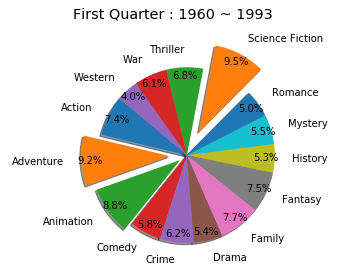

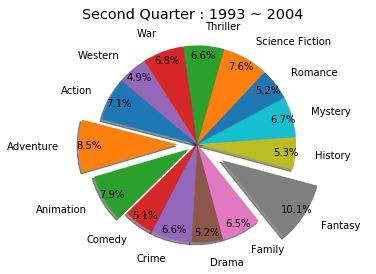

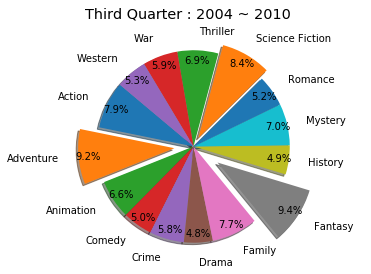

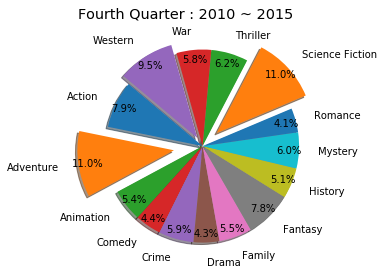

In [58]:
# first_quarter visualizaiton
visual(first_qt) 
# second_quarter visualizaiton
visual(second_qt) 
# third_quarter visualizaiton
visual(third_qt) 
# fourth_quarter visualizaiton
visual(fourth_qt) 

### Horray! Therefore, the graph shows that the genres with popularity over time period are

>1st quarter (1960 ~ 1993) :  1st - Science Fiction, 2nd - Adventure, 3rd - Animation

>2nd quarter (1993 ~ 2004) : 1st - Fantasy, 2nd - Adventure, 3rd - Animation 

>3rd quarter (2004 ~ 2010) : 1st - Fantasy, 2nd - Adventure, 3rd - Science Fiction 

>4th quarter (2010 ~ 2015) : 1st - Science Fiction, Adventure, 3rd - Western.



<a id='limitation'></a>
## Limitations

1. Null Values - Among the columns, cast had 10790 {NA:76}, director had 10822 {NA:44}, genres had 10843 {NA:23}, and production_companies had 9836 {NA:1030}. When I dropped all the null values, the rows changed from 10866 to 9773. Thus, there were total 1093 rows had been deleted.

2. Duplicated Values - There was 1 duplicated values and I dropped it. So, the total values I dropped were 1094 rows, which was approximately 10% of the original data.

3. Outliers - There were 3 outliers in budget, runtime, vote analysis and the calculation includes those outliers.

4. Statistical Approach - I used interquartile ranges most of the times but could have had better insights if I also tried other statistics.

<a id='conclusions'></a>
## Conclusions

Overall, this analysis provides insight of the questions that,

1. In average, popularity is directly proportional to budget, runtime, vote counts, and vote average.

2. Even in average among the top 25%, same result from question 1 applies.

3. The popularity of genres shifts time to time : 

In 1960-1993, the most popular genre was Science Fiction,

in 1993-2010, the most popular one was Fantasy, 

in 2010-2015, the popular ones were Science Fiction and Adventure.


Thank you very much for reading!

In [666]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0